# Project: Predicting financial data 
## Part 1 - Financial data mining
<b>Author:</b> Joeri van Wijngaarden<br>
<b>Date:</b> 17.03.2019<br>
<b>Source:</b> http://joerivanwijngaarden.com/project-financial-predictions-p1.html<br>
<b>Github:</b> https://github.com/tingidev/jvw-projects/tree/master/project-2-predicting-financial-data<p>

## Stock listings variables
<ol>
    <li><strong>loc</strong> - Location of the stock market</li>
    <li><strong>pe_val</strong> - Price/earnings ratio</li>
    <li><strong>name</strong> - Company's name</li>
    <li><strong>acronym</strong> - Company's name acronym</li>
    <li><strong>price</strong> - Closing price of stock</li>
    <li><strong>volume</strong> - Amount of stocks traded that day (in 1000's)</li>
    <li><strong>date</strong> - Date</li>
    <li><strong>date_str</strong> - Date as string</li>
    <li><strong>change</strong> - Percentage change with opening price</li>
</ol>


In [1]:
# Import friends
import os, sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import bson
from matplotlib.ticker import FormatStrFormatter
from matplotlib.font_manager import FontProperties
from matplotlib.cm import ScalarMappable
%matplotlib inline

## Functions

In [2]:
# Currency conversion
def convert_to_usd(val, loc):
    # Exchange rates as of 25.11.18
    if loc == 'NYC':
        rate = 1. # price already in US dollar
    if loc == 'LON':
        rate = 1.282 / 100 # price in pence, not pounds
    if loc == 'PAR' or loc == 'FRA':
        rate = 1.134 # price in euro
    if loc == 'HNK':
        rate = 0.128 # price on HK dollar
    if loc == 'TKY':
        rate = 0.00885 # price in yen
    newval = val*rate
    return float(format(newval, '.2f'))

## Load data

In [3]:
# Loading stocks BSON files
base_folder = 'C:/Users/jvw/Dropbox/data_dumps/tingi-sandbox/'
dump_folder = 'dump_19_02_03'
stockname = base_folder + dump_folder + '/stock_listings.bson'
with open(stockname, 'rb') as f:
    b = bson.decode_all(f.read())
stock = pd.DataFrame(b)

In [4]:
print('Size:', stock.shape, '\n')
print(stock.dtypes)
stock.head(5)

Size: (136653, 10) 

_id                 object
acronym             object
change             float64
date        datetime64[ns]
date_str            object
loc                 object
name                object
pe_val             float64
price              float64
volume             float64
dtype: object


,_id,acronym,change,date,date_str,loc,name,pe_val,price,volume
0,5b4d15d9ca145f6c3d78f9b9,MMM,-0.03,2018-07-16 22:02:01.629,2018-07-16,NYC,3M,29.8,201.11,1500.0
1,5b4d15daca145f6c3d78f9ba,AOS,-1.26,2018-07-16 22:02:02.841,2018-07-16,NYC,A. O. Smith Corp,33.6,59.47,1300.0
2,5b4d15daca145f6c3d78f9bb,ABT,-2.03,2018-07-16 22:02:02.946,2018-07-16,NYC,Abbott Laboratories,294.2,61.78,5800.0
3,5b4d15dbca145f6c3d78f9bc,None,0.18,2018-07-16 22:02:03.050,2018-07-16,LON,3I Group Rg,0.0,909.00,2000.0
4,5b4d15dbca145f6c3d78f9bd,None,0.93,2018-07-16 22:02:03.223,2018-07-16,PAR,Accor SA,20.6,44.63,788.2


In [5]:
# Stock markets included in dataset
locations = np.sort(stock['loc'].unique())
for loc in locations:
    n = len(stock.loc[stock['loc']==loc]['name'].unique())
    print('Loc:', loc, '-', n, 'companies')
print('Total:', len(stock['name'].unique()), 'stocks')

Loc: FRA - 32 companies
Loc: HNK - 52 companies
Loc: LON - 107 companies
Loc: NYC - 519 companies
Loc: PAR - 41 companies
Loc: TKY - 227 companies
Total: 977 stocks


In [6]:
# Days of open trade included in dataset
days = stock['date_str'].unique()
print('Number of days:', len(days))
print('First day:', days[0])
print('Last day:', days[-1], '\n')
print(days)

Number of days: 145
First day: 2018-07-16
Last day: 2019-02-01 

['2018-07-16' '2018-07-17' '2018-07-18' '2018-07-19' '2018-07-20'
 '2018-07-23' '2018-07-24' '2018-07-25' '2018-07-26' '2018-07-27'
 '2018-07-30' '2018-07-31' '2018-08-01' '2018-08-02' '2018-08-03'
 '2018-08-06' '2018-08-07' '2018-08-08' '2018-08-09' '2018-08-10'
 '2018-08-13' '2018-08-14' '2018-08-15' '2018-08-16' '2018-08-17'
 '2018-08-20' '2018-08-21' '2018-08-22' '2018-08-23' '2018-08-24'
 '2018-08-27' '2018-08-28' '2018-08-29' '2018-08-30' '2018-08-31'
 '2018-09-03' '2018-09-04' '2018-09-05' '2018-09-06' '2018-09-07'
 '2018-09-10' '2018-09-11' '2018-09-12' '2018-09-13' '2018-09-14'
 '2018-09-17' '2018-09-18' '2018-09-19' '2018-09-20' '2018-09-21'
 '2018-09-24' '2018-09-25' '2018-09-26' '2018-09-27' '2018-09-28'
 '2018-10-01' '2018-10-02' '2018-10-03' '2018-10-04' '2018-10-05'
 '2018-10-08' '2018-10-09' '2018-10-10' '2018-10-11' '2018-10-12'
 '2018-10-15' '2018-10-16' '2018-10-17' '2018-10-18' '2018-10-19'
 '2018-10-2

## General overview of stock markets (Fig. 1 & 2)

In [8]:
# Convert all prices to USD
stock['new_price'] = stock[['price','loc']].apply(lambda x: convert_to_usd(x['price'], x['loc']), axis=1)

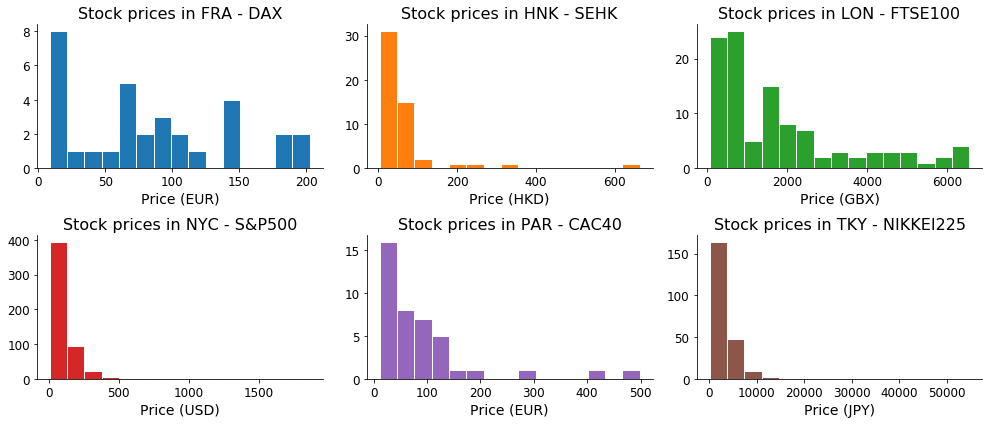

In [7]:
# Distribution of stock prices across stock markets
col = plt.get_cmap('tab10')
currency = ['EUR', 'HKD', 'GBX', 'USD', 'EUR', 'JPY']
title = ['DAX', 'SEHK', 'FTSE100', 'S&P500', 'CAC40', 'NIKKEI225']
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14,6))
i=0
for loc in locations:
    grouped = stock.loc[stock['loc']==loc].groupby('name')
    fig.axes[i].hist(grouped['price'].mean(), bins=15, edgecolor='white', facecolor=col.colors[i])
    fig.axes[i].set_xlabel('Price (' + currency[i] + ')', fontsize=14)
    fig.axes[i].set_title('Stock prices in ' + loc + ' - ' + title[i], fontsize=16)
    fig.axes[i].spines['right'].set_visible(False)
    fig.axes[i].spines['top'].set_visible(False)  
    fig.axes[i].tick_params(axis='both', which='major', labelsize=12)
    i += 1
fig.tight_layout()
# plt.savefig('./images/fig1.png')

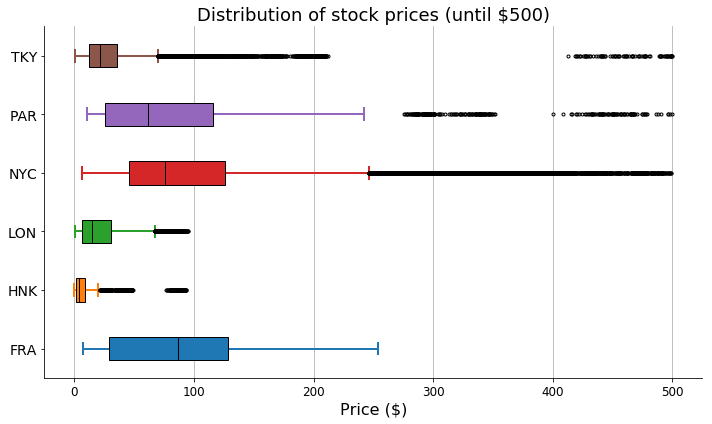

In [9]:
# Boxplot of stock prices, converted to US dollar prices
fig, ax = plt.subplots(figsize=(10, 6))
bp = stock.loc[stock['new_price']<500].boxplot(column='new_price', by='loc', ax=ax, notch=False, \
                                              sym='.', vert=False, widths=0.4, return_type='dict', patch_artist=True)
for i in range(6):
    bp['new_price']['boxes'][i].set_facecolor(col.colors[i])
    bp['new_price']['boxes'][i].set_edgecolor('k')
    bp['new_price']['whiskers'][2*i+1].set_color(col.colors[i])
    bp['new_price']['whiskers'][2*i+1].set_linewidth(2)
    bp['new_price']['whiskers'][2*i].set_color(col.colors[i])
    bp['new_price']['whiskers'][2*i].set_linewidth(2)
    bp['new_price']['caps'][2*i+1].set_color(col.colors[i])
    bp['new_price']['caps'][2*i+1].set_linewidth(2)
    bp['new_price']['caps'][2*i].set_color(col.colors[i])
    bp['new_price']['caps'][2*i].set_linewidth(2)
    bp['new_price']['medians'][i].set_color('k')

ax.set_xlabel('Price ($)', fontsize=16)
ax.set_title('Distribution of stock prices (until $500)', fontsize=18)
# ax.set_title(' ', fontsize=10) # for website
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y')
plt.suptitle("")

fig.tight_layout()
# plt.savefig('./images/fig2.png')

## Changes of individual stocks (Fig. 3 & 4)

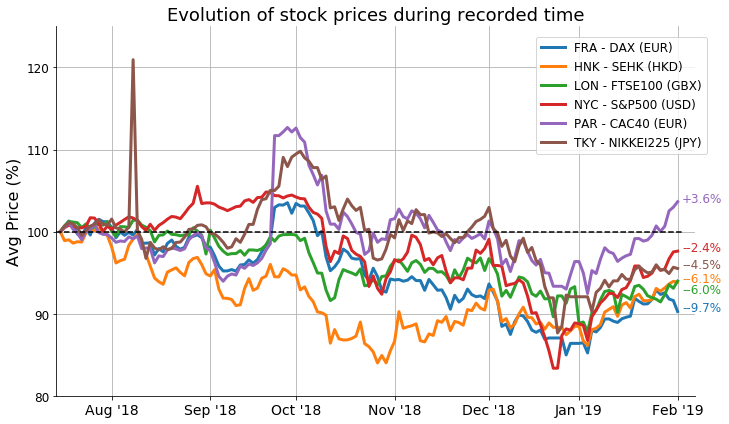

In [10]:
# Average stock market prices over time for the recorded duration
font = FontProperties()
font.set_weight='black'
ticks = [12, 35, 55, 78, 100, 121, 144]
fig, ax = plt.subplots(figsize=(10, 6))
i=0
for loc in locations:
    grouped = stock.loc[stock['loc']==loc].groupby('date_str')['price'].mean().values
    norm = (grouped / grouped[0] * 100)
    ax.plot(norm, linewidth=3, color=col.colors[i])
    val = norm[-1] - 100
    if loc == 'LON':
        ax.text(len(days), norm[-1]-1.5, '-' + "{:3.1f}".format(val) + '%', fontproperties=font,\
                color=col.colors[i], fontsize=12)
    elif loc == 'PAR':
        ax.text(len(days), norm[-1], '+' + "{:3.1f}".format(val) + '%', fontproperties=font,\
                color=col.colors[i], fontsize=12)
    else:
        ax.text(len(days), norm[-1], '-' + "{:3.1f}".format(val) + '%', fontproperties=font,\
                color=col.colors[i], fontsize=12)
    i += 1
    
ax.set_ylabel('Avg Price (%)', fontsize=16)
ax.set_xticks(ticks)
ax.set_ylim([80, 125])
ax.set_xlim([-1, len(days) + 3])
ax.set_xticklabels(['Aug \'18', 'Sep \'18', 'Oct \'18', 'Nov \'18', 'Dec \'18', 'Jan \'19', 'Feb \'19'])
ax.set_yticks(np.linspace(80, 120, num=5))
ax.set_title('Evolution of stock prices during recorded time', fontsize=18)
# ax.set_title(' ',fontsize=10) # for website
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)   
ax.plot([-1, len(days)], [100, 100], '--', color=[0, 0, 0], linewidth=1.5)
ax.grid(axis='both')
fig.legend(locations + ' - ' + title + ' (' + currency + ')', bbox_to_anchor=(0.99, 0.91), fontsize=12)
fig.tight_layout()
# plt.savefig('./images/fig3.png')

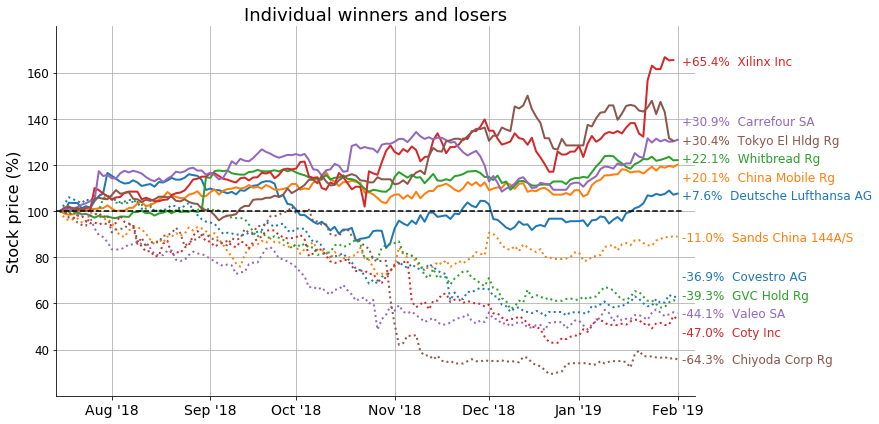

In [13]:
# Identify the biggest winners and losers
start_price = stock.loc[stock['date_str']==days[0]][['name', 'new_price', 'loc']]
end_price = stock.loc[stock['date_str']==days[-1]][['name', 'new_price', 'loc']]
merged = pd.merge(start_price, end_price, on=['name'], how='inner')
merged['delta_price'] = merged['new_price_y'] / merged['new_price_x'] * 100 - 100

fig, ax = plt.subplots(figsize=(10, 6))
top_index = [0, 0, 1, 0, 0, 9]
bot_index = [0, 10, 1, 1, 0, 0]
font = FontProperties()
font.set_weight='black'
ticks = [12, 35, 55, 78, 100, 121, 144]
y1 = [105, 113, 121, 163, 137, 129]
y2 = [70, 87, 62, 46, 54, 34]
i = 0
tmp_save = []
legends = []

for loc in locations:
    grouped = merged.loc[merged['loc_x']==loc]
    
    # Winner
    winner = grouped.sort_values(by=['delta_price'], ascending=False).iloc[top_index[i]]
    tmp = stock.loc[stock['name']==winner['name']]
    trace = tmp['new_price'].values
    mylabel = loc + ' - ' + title[i]
    ax.plot(trace / trace[0] * 100, color=col.colors[i], linewidth=2, label=mylabel)
    val = trace[-1] / trace[0] * 100 - 100
    txt = ax.text(len(days), y1[i], '+' + "{:3.1f}".format(val) + '%  ' + winner['name'], fontproperties=font,\
                  color=col.colors[i], fontsize=12)
    if loc=='FRA':
        txtsave = txt
    
    # Loser
    loser = grouped.sort_values(by=['delta_price'], ascending=True).iloc[bot_index[i]]
    tmp = stock.loc[stock['name']==loser['name']]
    trace = tmp['new_price'].values
    ax.plot(trace / trace[0] * 100, color=col.colors[i], linewidth=2, linestyle=':')
    val = trace[-1] / trace[0] * 100 - 100
    ooo = ax.text(len(days), y2[i], "{:3.1f}".format(val) + '%  ' + loser['name'], fontproperties=font,\
                  color=col.colors[i], fontsize=12)
    tmp_save.append(ooo)
    legends.append('')
    i += 1
    
# Style
ax.set_ylabel('Stock price (%)', fontsize=16)
ax.set_xticks(ticks)
ax.set_ylim([20, 180])
ax.set_xlim([-1, len(days) + 3])
ax.set_xticklabels(['Aug \'18', 'Sep \'18', 'Oct \'18', 'Nov \'18', 'Dec \'18', 'Jan \'19', 'Feb \'19'])
ax.set_yticks(np.linspace(40, 160, num=7))
ax.set_title('Individual winners and losers', fontsize=18)
# ax.set_title(' ',fontsize=10) # for website
ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
ax.grid(axis='both')
ax.plot([-1, len(days)], [100, 100], '--', color=[0, 0, 0], linewidth=1.5)
# fig.legend(bbox_to_anchor=(0.28, 0.35), fontsize=12)
fig.tight_layout()
# plt.savefig('./images/fig4.png', bbox_extra_artists=(txtsave,), bbox_inches='tight')

## Trade volume vs. price change (Fig. 5)

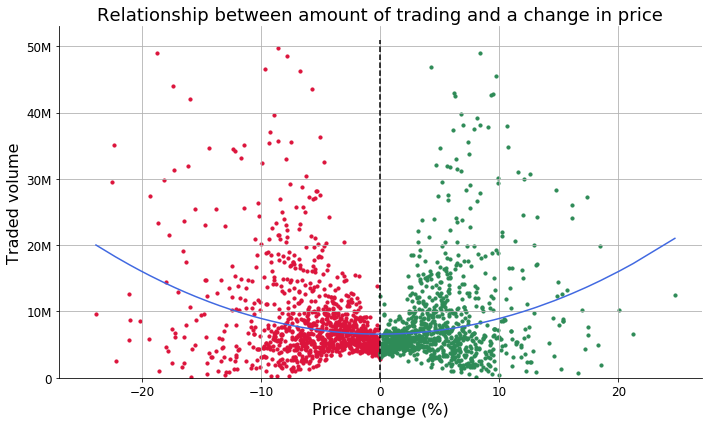

In [14]:
# Vizualize volume of trade and percentage change
grouped = stock.groupby('change')['volume'].mean().reset_index()
grouped = grouped.loc[grouped['volume'] < 50000].loc[np.abs(grouped['change']) < 25] # remove some outliers for visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(grouped.loc[grouped['change'] < 0]['change'], grouped.loc[grouped['change'] < 0]['volume']\
           / 1000, 10, 'crimson') # converted from thousands to millions
ax.scatter(grouped.loc[grouped['change'] >= 0]['change'], grouped.loc[grouped['change'] >= 0]['volume']\
           / 1000, 10,'seagreen') # converted from thousands to millions
ax.set_xticks(np.linspace(-20, 20, 5))
ax.set_yticks(np.linspace(0, 50, 6))
labels = ax.get_yticks()
new_labels = [str(format(label, '.0f')) + "M" if label > 0 else str(format(label, '.0f')) for label in labels]
ax.set_yticklabels(new_labels)
ax.set_xlim([-27, 27])
ax.set_ylim([0, 53])
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Price change (%)', fontsize=16)
ax.set_ylabel('Traded volume', fontsize=16)
ax.set_title('Relationship between amount of trading and a change in price', fontsize=18)
# ax.set_title(' ',fontsize=10) # for website
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)   
ax.grid(True)
ax.plot([0, 0], [0, 51], '--', color=[0, 0, 0], linewidth=1.5)
x = grouped['change']
y = grouped['volume'] / 1000 - 1
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)), color='royalblue')

fig.tight_layout()
# plt.savefig('./images/fig5.png')